Đọc dữ liệu đầu vào

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

#Giúp bảng không tự xuống dòng
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

script_directory = Path.cwd() 
TitanicDataset = script_directory / 'Titanic-Dataset.csv'
df = pd.read_csv(TitanicDataset)


Xử lý dữ liệu các cột và chuẩn hóa (để đo độ phân tán từng dữ liệu)

In [16]:
# Xóa PassengerId:
df = df.drop(columns=['PassengerId'])

# Tách cột Survived ra riêng:
df_survived = df['Survived'].values
df = df.drop(columns=['Survived'])

# Xử lý cột Pclass: không cần

# Xóa Name:
df = df.drop(columns=['Name'])

# Xử lý cột Sex:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Xử lý cột Age: Điền các giá trị còn thiếu bằng số Trung vị (28.0)
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)

# Xử lý cột SibSp: không cần

# Xử lý cột Parch: không cần

# Xử lý cột Ticket: 
    # Đếm số lần xuất hiện của mỗi mã vé 
ticket_counts = df['Ticket'].value_counts()
df['TicketFrequency'] = df['Ticket'].map(ticket_counts)
    # Xóa cột Ticket cũ
df = df.drop(columns=['Ticket'])

# Xử lý Fare: không cần

# Xóa Cabin(quá ít dữ liệu): 
df = df.drop(columns=['Cabin'])

# Xử lý Embarked: C (Cherbourg), Q (Queenstown), và S (Southampton)
df['Embarked_C'] = (df['Embarked'] == 'C').astype(int)
df['Embarked_Q'] = (df['Embarked'] == 'Q').astype(int)
# Cả 2 cột bằng 0 thì tức là Embarked = S
df = df.drop(columns=['Embarked'])


# Thêm cột Bias:
df['Bias'] = 1

print("DU lieu sau khi xu ly: ")
print(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'TicketFrequency', 'Fare', 'Embarked_C', 'Embarked_Q', 'Bias']].head(10))

DU lieu sau khi xu ly: 
   Pclass  Sex   Age  SibSp  Parch  TicketFrequency     Fare  Embarked_C  Embarked_Q  Bias
0       3    0  22.0      1      0                1   7.2500           0           0     1
1       1    1  38.0      1      0                1  71.2833           1           0     1
2       3    1  26.0      0      0                1   7.9250           0           0     1
3       1    1  35.0      1      0                2  53.1000           0           0     1
4       3    0  35.0      0      0                1   8.0500           0           0     1
5       3    0  28.0      0      0                1   8.4583           0           1     1
6       1    0  54.0      0      0                1  51.8625           0           0     1
7       3    0   2.0      3      1                4  21.0750           0           0     1
8       3    1  27.0      0      2                3  11.1333           0           0     1
9       2    1  14.0      1      0                2  30.0708      

In [17]:
#Các cột cần chuẩn hóa
std_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'TicketFrequency', 'Fare']

df_processed = df.copy()
df_before = [df[i] for i in std_cols]
df_after = []

#Chuẩn hóa: z = (x - mean) / standard deviation
for i in std_cols:
    mean_val = df[i].mean() #trung bình
    std_val = df[i].std() #độ lệch chuẩn
    df[i] = (df[i] - mean_val) / std_val
    df_after.append(df[i])

print("Du lieu sau khi da xu ly va chuan hoa:")
print(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'TicketFrequency', 'Fare', 'Embarked_C', 'Embarked_Q', 'Bias']].head(10))

print("Kich thuoc ma tran cua du lieu cuoi cung", df.shape)

Du lieu sau khi da xu ly va chuan hoa:
     Pclass  Sex       Age     SibSp     Parch  TicketFrequency      Fare  Embarked_C  Embarked_Q  Bias
0  0.826913    0 -0.565419  0.432550 -0.473408        -0.578837 -0.502163           0           0     1
1 -1.565228    1  0.663488  0.432550 -0.473408        -0.578837  0.786404           1           0     1
2  0.826913    1 -0.258192 -0.474279 -0.473408        -0.578837 -0.488580           0           0     1
3 -1.565228    1  0.433068  0.432550 -0.473408         0.155841  0.420494           0           0     1
4  0.826913    0  0.433068 -0.474279 -0.473408        -0.578837 -0.486064           0           0     1
5  0.826913    0 -0.104579 -0.474279 -0.473408        -0.578837 -0.477848           0           1     1
6 -1.565228    0  1.892396 -0.474279 -0.473408        -0.578837  0.395591           0           0     1
7  0.826913    0 -2.101553  2.246209  0.767199         1.625195 -0.223957           0           0     1
8  0.826913    1 -0.18138

C:\Users\HeLi\AppData\Local\Temp\ipykernel_29044\2519650451.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_before, labels=std_cols)
C:\Users\HeLi\AppData\Local\Temp\ipykernel_29044\2519650451.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_after, labels=std_cols)


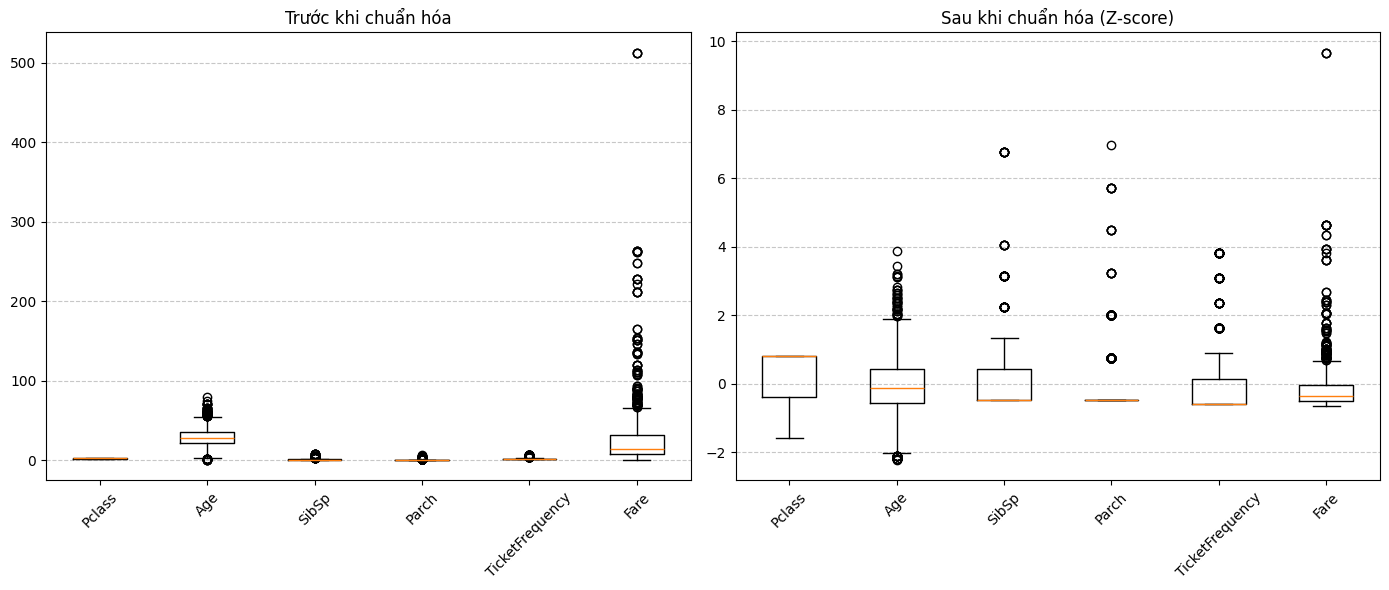

In [18]:
# Vẽ biểu đồ bằng Matplotlib
plt.figure(figsize=(14, 6))

# Biểu đồ bên trái: Trước khi chuẩn hóa
plt.subplot(1, 2, 1)
plt.boxplot(df_before, labels=std_cols)
plt.title('Trước khi chuẩn hóa')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Biểu đồ bên phải: Sau khi chuẩn hóa
plt.subplot(1, 2, 2)
plt.boxplot(df_after, labels=std_cols)
plt.title('Sau khi chuẩn hóa (Z-score)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Tìm weights theo Normal Equation:
$$w = (X^T X)^{-1} X^T y$$

**Trong đó:**
* $w$: Vectơ trọng số (weights) cần tìm để tối ưu hóa mô hình.
* $X$: Ma trận dữ liệu đầu vào. (Trong bài là ma trận gồm các đặc trưng của hành khách)
* $X^T$: Ma trận chuyển vị của $X$.
* $(X^T X)^{-1}$: Ma trận nghịch đảo của tích giữa ma trận chuyển vị và chính nó.
* $y$: Vectơ giá trị mục tiêu (Target vector/labels). (Trong bài là ma trận tạo ra từ cột Survived)

In [19]:
#Viết lại df thành X:
X = df
#Viết lại Survived thành y:
y = df_survived

#Tính ma trận chuyển vị của X
XT = X.T
#tính X^T * X
XTX = XT.dot(X)
#Tính X^T * y 
XTy = XT.dot(y)

#Tính nghịch đảo của XTX
XTX_inv = np.linalg.inv(XTX)

#Tính weights
w = XTX_inv.dot(XTy)

weights = np.array(w)
print(weights)

[-0.14385696  0.50546291 -0.07557275 -0.04432096 -0.01147528  0.01532376
 -0.00306889  0.06285584  0.05836955  0.18881078]


In [20]:
#Tính toán MSE
survival_index = X.dot(weights) 
mse_linear = np.mean((y - survival_index)**2)
print(f"Chi so MSE (Linear Regression): {mse_linear}")

Chi so MSE (Linear Regression): 0.1424427286986728


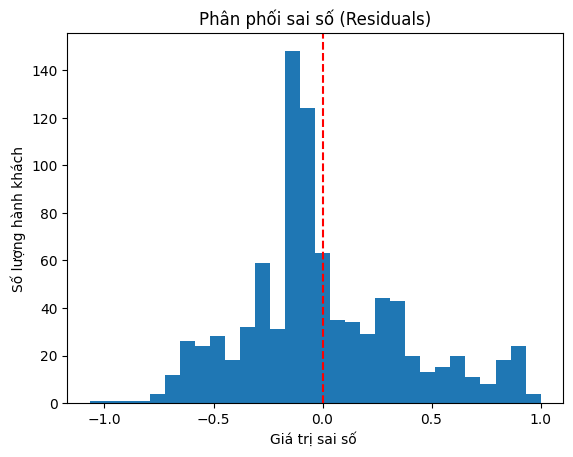

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

loss = y - survival_index
plt.hist(loss, bins=30)
plt.axvline(0, color='red', linestyle='--') # Đường sai số bằng 0
plt.title('Phân phối sai số')
plt.xlabel('Giá trị sai số ')
plt.ylabel('Số lượng hành khách')
plt.show()

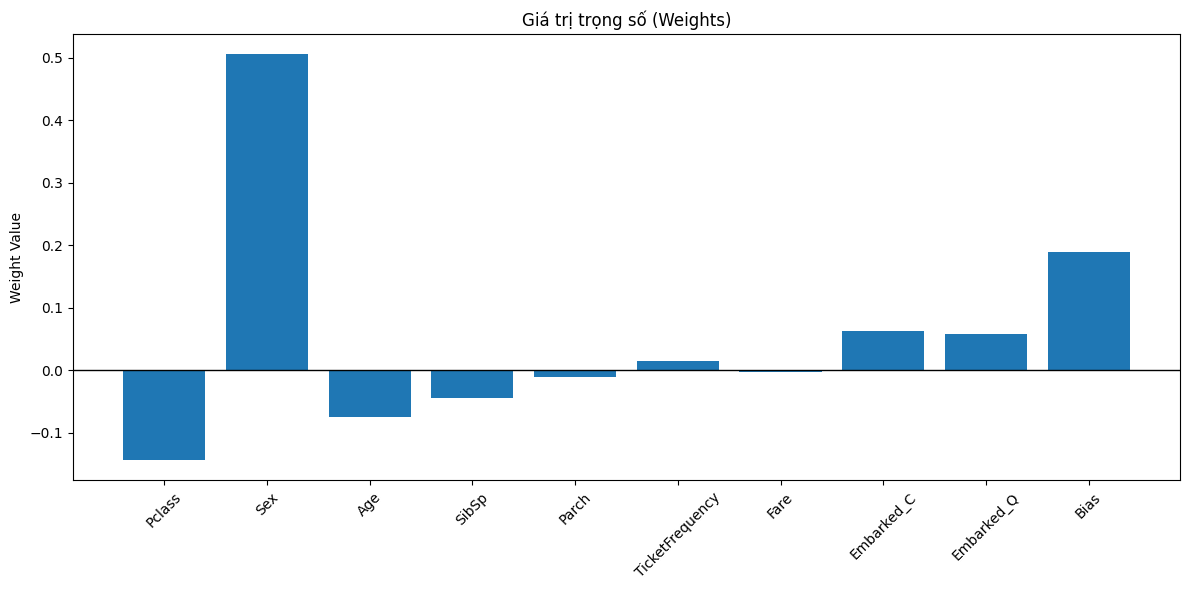

In [22]:
plt.figure(figsize=(12, 6)) # Thiết lập kích thước ảnh

col_final = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'TicketFrequency', 'Fare', 'Embarked_C', 'Embarked_Q', 'Bias']

# Vẽ biểu đồ cột
plt.bar(col_final, weights)
# Thêm đường kẻ ngang màu đen ở giá trị 0 để làm mốc
plt.axhline(y=0, color='black', linewidth=1)
# Thêm tiêu đề và nhãn trục
plt.title('Giá trị trọng số (Weights)')
plt.ylabel('Weight Value')
# Xoay tên các cột 45 độ cho dễ đọc
plt.xticks(rotation=45)
# Hiển thị
plt.tight_layout()
plt.show()

Hàm tính tỉ lệ sống sót theo weights

In [23]:
# Tạo dict để lưu thông số
stats = {}

# Tính Mean
for i in std_cols:
    stats[i] = {'mean': df_processed[i].mean()}

# Tính Std
for i in std_cols:
    stats[i]['std'] = df_processed[i].std()

# In dict stats
for col, val in stats.items():
    print(f"{col}: Mean = {val['mean']}, Std = {val['std']}")

Pclass: Mean = 2.308641975308642, Std = 0.836071240977049
Age: Mean = 29.36158249158249, Std = 13.019696550973201
SibSp: Mean = 0.5230078563411896, Std = 1.1027434322934317
Parch: Mean = 0.38159371492704824, Std = 0.8060572211299483
TicketFrequency: Mean = 1.7878787878787878, Std = 1.3611417426991503
Fare: Mean = 32.204207968574636, Std = 49.6934285971809


In [24]:
#Hàm tính xác suất sống sót qua thông tin đầu vào (nếu thiếu thông tin thì trả về giá trị mặc định)
def predict_survival(pclass=3, sex='male', age=28.0, sibsp=0, parch=0, 
                     ticket_freq=1, fare=14.45, embarked='S'):
    
    # Chuẩn hóa
    pclass_std = (pclass - stats['Pclass']['mean']) / stats['Pclass']['std']
    age_std = (age - stats['Age']['mean']) / stats['Age']['std']
    sibsp_std = (sibsp - stats['SibSp']['mean']) / stats['SibSp']['std']
    parch_std = (parch - stats['Parch']['mean']) / stats['Parch']['std']
    ticketfreq_std = (ticket_freq - stats['TicketFrequency']['mean']) / stats['TicketFrequency']['std']
    fare_std = (fare - stats['Fare']['mean']) / stats['Fare']['std']
    
    # Xử lý sex và embarked
    sex_num = 1 if sex.lower() == 'female' else 0
    embarked_c = 1 if embarked.upper() == 'C' else 0
    embarked_q = 1 if embarked.upper() == 'Q' else 0
    
    # Vector input (Khớp đúng thứ tự Weight)
    vector_input = np.array([pclass_std, sex_num, age_std, sibsp_std, parch_std, ticketfreq_std, fare_std, embarked_c, embarked_q, 1.0])
    
    # Tính toán
    sr = np.dot(vector_input, weights)
    return sr

In [25]:
print(f'Ti le song sot mac dinh la: {predict_survival()*100:.2f}%')

Ti le song sot mac dinh la: 9.64%


Hàm lấy dữ liệu đầu vào từ người dùng

In [26]:
def get_infor():
    print("\n--- NHAP THONG TIN HANH KHACH ---")
    
    # Pclass
    p = input("Nhap Hang ve (1, 2, 3) [Mac dinh 3]: ")
    if p == "1" or p == "2" or p == "3":
        pclass = float(p)
    else:
        pclass = 3.0 # Mac dinh la 3

    # Sex
    s = input("Nhap Gioi tinh (male/female) [Mac dinh male]: ").lower() # Cho cả chữ viết hoa hợp lệ
    if s == "female":
        sex = "female"
    else:
        sex = "male" # Mac dinh la nam

    # Age
    a = input("Tuoi (0-100) [Mac dinh 28]: ")
    if a.replace('.', '', 1).isdigit():  # Số chỉ hợp lệ nếu có 1 dấu "."
        age = float(a)
        if age < 0 or age > 100:
            age = 28.0
    else:
        age = 28.0

    # Fare
    f = input("Nhap Gia ve [Mac dinh 14.45]: ")
    if f.replace('.', '', 1).isdigit():
        fare = float(f)
    else:
        fare = 14.45

    # Embarked
    e = input("Nhap Cang (S, C, Q) [Mac dinh S]: ").upper() # Cho cả chữ viết thường hợp lệ
    if e == "C" or e == "Q" or e == "S":
        embarked = e
    else:
        embarked = "S"

    # SipSp
    sib = input("So anh chi em/ vo chong di cung [Mac dinh 0]: ")
    if sib.isdigit(): 
        sibsp = float(sib)
        if sibsp < 0: 
            sibsp = 0.0
    else:
        sibsp = 0.0

    # Parch
    par = input("So bo me/ con cai di cung [Mac dinh 0]: ")
    if par.isdigit():
        parch = float(par)
        if parch < 0: 
            parch = 0.0
    else:
        parch = 0.0

    # Ticket Frequency 
    tf = input("So nguoi dung chung 1 ma ve [Mac dinh 1]: ")
    if tf.isdigit():
        ticket_freq = float(tf)
        if ticket_freq < 1: 
            ticket_freq = 1.0
    else:
        ticket_freq = 1.0

    # Lưu tất cả vào Dict
    data = {
        'pclass': pclass,
        'sex': sex,
        'age': age,
        'fare': fare,
        'embarked': embarked,
        'sibsp': sibsp,
        'parch': parch,
        'ticket_freq': ticket_freq
    }
    
    return data

Chạy thử chương trình

In [27]:
passenger_data = get_infor()
survival_rate = predict_survival(**passenger_data)

print(f"Ti le song sot du doan theo Linear Regression la: {survival_rate * 100:.2f}%")


--- NHAP THONG TIN HANH KHACH ---
Ti le song sot du doan theo Linear Regression la: 9.64%
